#Expenses data analysis with Python💸

I started recording my expenses in my Notion app three months ago to reduce spending and build healthier financial habits. However, simply recording the data didn’t bring any real change to my spending behavior. So, I decided to analyze my spending data over the past three months using Python to set a clear spending goal for this month.

I collected data about the items I bought, their prices, categories, and dates using the Selenium module in Python. I used PyCharm as my editor for the web crawling and saved the data as a CSV file named expense.csv.

The image below shows what the original dataset looks like.

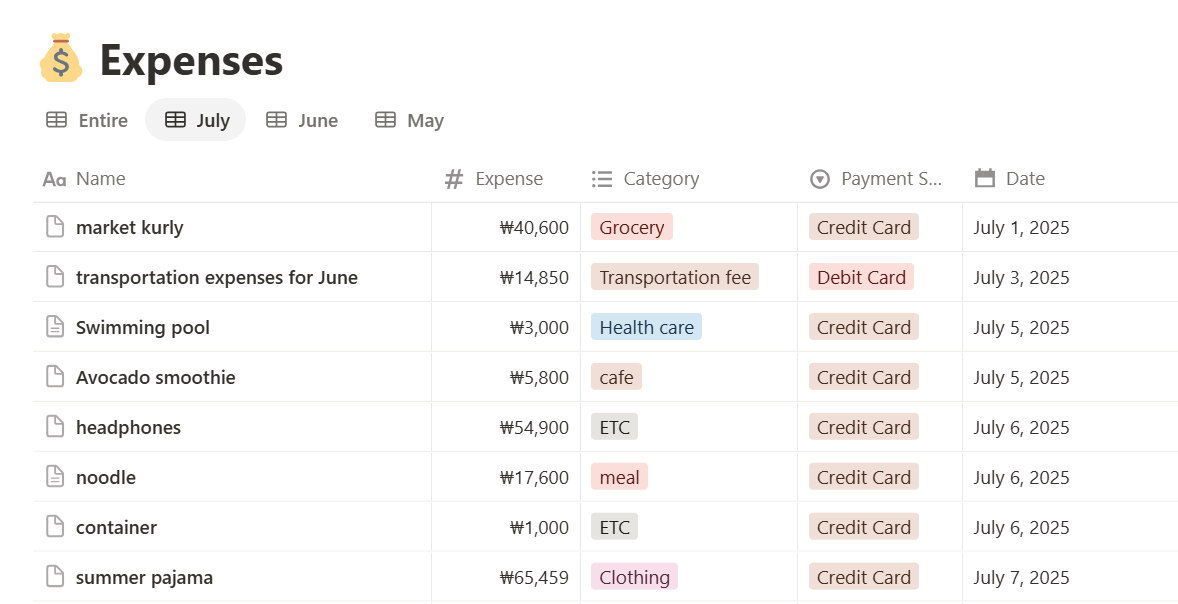

  
I plan to analyze the following:

1. How much money I spent during the last three months
2. Which categories I spent the most on
3. Monthly trends in total expenses and the top five spending categories

The ultimate goal of this analysis is to define a realistic spending goal for this month.

## 1. Data Importing

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the CSV file
df = pd.read_csv('../data/expenses.csv')

In [ ]:
# Check if the data frame is imported properly
df

,items,prices,categories,date
0,daiso,"₩4,000",Daily necessities,"May 1, 2025"
1,olive young,"₩42,800",Daily necessities,"May 1, 2025"
2,sun screen,"₩21,600",Daily necessities,"May 1, 2025"
3,pado cardigan pattern,"₩10,000",Hobbies,"May 1, 2025"
4,slippers,"₩7,150",Daily necessities,"May 1, 2025"
...,...,...,...,...
116,sqld test,"₩50,000",Self improvement,"July 24, 2025"
117,pattern for sweater,"₩10,000",Hobbies,"July 26, 2025"
118,matcha latte,"₩5,500",cafe,"July 27, 2025"
119,thai food,"₩17,000",meal,"July 27, 2025"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   items       121 non-null    object
 1   prices      121 non-null    object
 2   categories  121 non-null    object
 3   date        121 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


## 2. Data Preprocessing

The date column was imported correctly, but there is an issue for analysis: all columns are currently of the object data type. The Price column and Date column should be int and datetime, respectively. Therefore, I am going to change the data types for the analysis.

In [ ]:
# Clean the Price column by removing strings so it can be converted to an integer data type
df['prices'] = df['prices'].str.replace('₩', '')
df['prices'] = df['prices'].str.replace(',', '')
df['prices'] = df['prices'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   items       121 non-null    object
 1   prices      121 non-null    int64 
 2   categories  121 non-null    object
 3   date        121 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [ ]:
# Convert the Date column from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   items       121 non-null    object        
 1   prices      121 non-null    int64         
 2   categories  121 non-null    object        
 3   date        121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.9+ KB


In [ ]:
# Add a 'month' column to group and analyze the data by month
df['month'] = df['date'].dt.month.astype('str')

In [ ]:
df

,items,prices,categories,date,month
0,daiso,4000,Daily necessities,2025-05-01,5
1,olive young,42800,Daily necessities,2025-05-01,5
2,sun screen,21600,Daily necessities,2025-05-01,5
3,pado cardigan pattern,10000,Hobbies,2025-05-01,5
4,slippers,7150,Daily necessities,2025-05-01,5
...,...,...,...,...,...
116,sqld test,50000,Self improvement,2025-07-24,7
117,pattern for sweater,10000,Hobbies,2025-07-26,7
118,matcha latte,5500,cafe,2025-07-27,7
119,thai food,17000,meal,2025-07-27,7


## 3. Data Analysis

### (1) Total spending over the last three months

In [ ]:
# Calculate the total monthly spending
total = df['prices'].sum()
print(f'💸total monthly spending : KRW {int(total):,}')

💸total monthly spending : KRW 2,543,076


In [ ]:
# Calculate the average monthly spending
avg = df['prices'].sum() / 3
print(f'💸average monthly spending : KRW {int(avg):,}')

💸average monthly spending : KRW 847,692


In [ ]:
# Calculate the total spending for each month
monthly_sum = df.groupby('month')['prices'].sum()
monthly_sum

,prices
month,
5,1119895
6,734992
7,688189


/tmp/ipython-input-2774827255.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


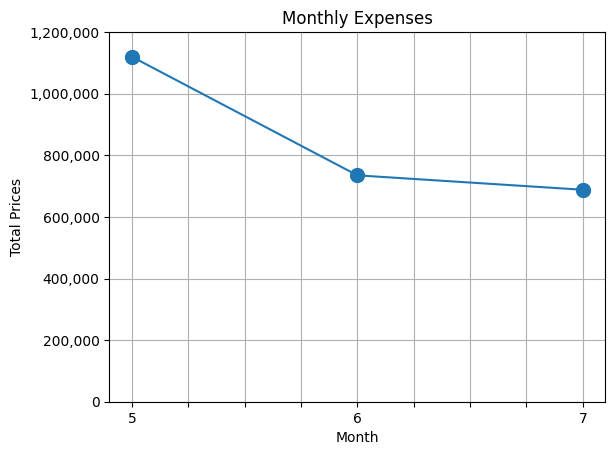

In [ ]:
# Visualize the DataFrame as a line graph

monthly_sum.plot(kind='line', marker='o', markersize=10)
plt.title('Monthly Expenses')
plt.xlabel('Month')
plt.ylabel('Total Prices')

plt.ylim([0,1200000])

plt.ticklabel_format(style='plain', axis='y')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


plt.grid(True)
plt.show()

Here is a simple description of the results:

- Total: KRW 2,543,076
- Average: KRW 847,692
- Maximum: KRW 1,119,895 (May)
- Minimum: KRW 688,189 (July)

The data shows a gradually decreasing trend over the last three months.

I spent the most in May, so I conducted additional analysis to identify the main causes of the higher spending during that month.

In [ ]:
# Create a new data frame that includes only the spending in May
May = df[df['month']=='5']

In [ ]:
# Calculate spending in May grouped by category
May_ctgr = May.groupby('categories', as_index=False)['prices'].sum()

In [ ]:
# Sort the grouped data by spending amount
May_sorted = May_ctgr.sort_values(by='prices', ascending=False)
May_sorted

,categories,prices
6,Health care,203235
3,Daily necessities,178060
11,meal,150200
0,Clothing,126770
8,Self improvement,117000
4,Family occasion,100000
1,Cosmetics,77010
10,cafe,73100
7,Hobbies,44760
2,Cultural activities,18160


I found that the top three spending categories were:

1. Health care
2. Daily necessities
3. Meals

Next, I examined the specific items I purchased in each category.

In [ ]:
May[May['categories'] == 'Health care']

,items,prices,categories,date,month
5,swimming pool,3000,Health care,2025-05-02,5
20,swimming pool,3000,Health care,2025-05-09,5
23,swimming pool,3000,Health care,2025-05-11,5
26,swimming pool,3000,Health care,2025-05-12,5
36,runnig shoes,132335,Health care,2025-05-19,5
40,sports wear,52900,Health care,2025-05-20,5
46,swimming pool,3000,Health care,2025-05-26,5
48,swimming pool,3000,Health care,2025-05-30,5


A pair of running shoes and sportswear accounted for most of the spending in the health care category.

In [ ]:
May[May['categories'] == 'Daily necessities']

,items,prices,categories,date,month
0,daiso,4000,Daily necessities,2025-05-01,5
1,olive young,42800,Daily necessities,2025-05-01,5
2,sun screen,21600,Daily necessities,2025-05-01,5
4,slippers,7150,Daily necessities,2025-05-01,5
6,eye drops,12000,Daily necessities,2025-05-02,5
7,trash bin,4000,Daily necessities,2025-05-02,5
9,olive young,80510,Daily necessities,2025-05-02,5
12,renew,5000,Daily necessities,2025-05-05,5
17,shower sponge,1000,Daily necessities,2025-05-08,5


In the daily necessities category, I spent a significant amount of money at Olive Young, a drugstore in Korea.

In [ ]:
May[May['categories'] == 'meal']

,items,prices,categories,date,month
22,tteokbokki,12000,meal,2025-05-10,5
25,sushi,26000,meal,2025-05-12,5
28,chinese food,18600,meal,2025-05-14,5
29,chinese food,26000,meal,2025-05-15,5
32,noodles,15800,meal,2025-05-17,5
39,hamburger,8500,meal,2025-05-20,5
42,sandwich,7800,meal,2025-05-23,5
43,hot pot,21900,meal,2025-05-24,5
44,thai food,13600,meal,2025-05-25,5


I also ate out nine times in May.

Therefore, the main reasons for the higher spending in May can be summarized as follows:

1. I had just returned to Korea after a year abroad, so I had many things to buy.
2. I had a lot of hang out schedules with my friends in May.
3. I purchased several expensive products in the health care category.

### (2) Which categories I spent the most on

In [ ]:
# Calculate total spending grouped by category
ctgr_grouped = df.groupby('categories', as_index=False)['prices'].sum()
ctgr_grouped

,categories,prices
0,Clothing,314953
1,Cosmetics,195408
2,Cultural activities,52960
3,Daily necessities,380360
4,ETC,168300
5,Family occasion,100000
6,Grocery,128070
7,Health care,235935
8,Hobbies,213660
9,Self improvement,280800


In [ ]:
# Sort the grouped data by spending amount
ctgr_sorted = ctgr_grouped.sort_values(by='prices', ascending=False)
ctgr_sorted

,categories,prices
3,Daily necessities,380360
0,Clothing,314953
9,Self improvement,280800
7,Health care,235935
8,Hobbies,213660
1,Cosmetics,195408
14,meal,188500
13,cafe,185200
4,ETC,168300
6,Grocery,128070


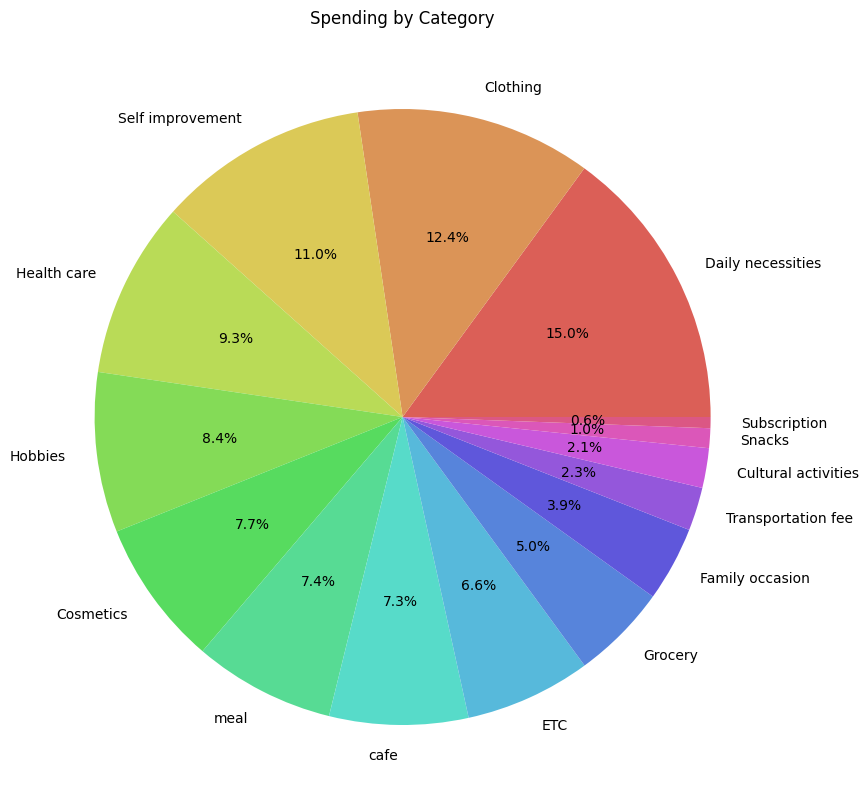

In [ ]:
# Create a pie chart to show the proportion of each category

colors = sns.color_palette('hls', len(ctgr_sorted))
plt.figure(figsize=(10,10))
plt.pie(ctgr_sorted['prices'], labels=ctgr_sorted['categories'], autopct='%.1f%%', colors=colors)
plt.title('Spending by Category')
plt.show()

In this part, I was able to see which categories I spent the most money on.
The top 5 categories I spent the most on are daily necessities, clothing, self-improvement, health care, and hobbies.

### (3) Monthly trends in total expenses and the top five spending categories

In [ ]:
# Create a new DataFrame named 'trends' to analyze monthly spending trends
trends = df.groupby('month', as_index=False)['prices'].sum()

In [ ]:
trends

,month,prices
0,5,1119895
1,6,734992
2,7,688189


In [ ]:
# Change the month names to May, June, and July
trends['month'] = np.where(trends['month'] == '5', 'May', trends['month'])
trends['month'] = np.where(trends['month'] == '6', 'June', trends['month'])
trends['month'] = np.where(trends['month'] == '7', 'July', trends['month'])

In [ ]:
trends

,month,prices
0,May,1119895
1,June,734992
2,July,688189


In [ ]:
# Create a new column to show how much my spending increased or decreased compared to the previous month
trends['entire_change'] = trends['prices'].pct_change().fillna(0)

In [ ]:
trends

,month,prices,entire_change
0,May,1119895,0.000000
1,June,734992,-0.343696
2,July,688189,-0.063678


In [ ]:
# Convert the values to percentages and round to two decimal places
trends['entire_change'] = round(trends['entire_change']*100, 2)

In [ ]:
trends

,month,prices,entire_change
0,May,1119895,0.00
1,June,734992,-34.37
2,July,688189,-6.37


In [ ]:
# Select the top 5 categories to analyze spending trends
ctgr_sorted.iloc[0:5, 0]

,categories
3,Daily necessities
0,Clothing
9,Self improvement
7,Health care
8,Hobbies


I found that the top 5 categories I spent the most on are:

1. Daily necessities
2. Clothing
3. Self-improvement
4. Health care
5. Hobbies

In [ ]:
# Create columns to show spending amounts and trends for the 'Daily necessities' category
daily_necessities = df[df['categories'] == 'Daily necessities'].groupby('month', as_index=False)['prices'].sum()
trends['necessities'] = daily_necessities['prices']
trends['necessities_change'] = trends['necessities'].pct_change().fillna(0)
trends['necessities_change'] = round(trends['necessities_change']*100, 2)

In [ ]:
trends

,month,prices,entire_change,necessities,necessities_change
0,May,1119895,0.00,178060,0.00
1,June,734992,-34.37,163900,-7.95
2,July,688189,-6.37,38400,-76.57


In [ ]:
# Create columns to show spending amounts and trends for the 'Clothing' category
clothing = df[df['categories'] == 'Clothing'].groupby('month', as_index=False)['prices'].sum()
trends['clothing'] = clothing['prices']
trends['clothing_change'] = trends['clothing'].pct_change().fillna(0)
trends['clothing_change'] = round(trends['clothing_change']*100, 2)

In [ ]:
# Create columns to show spending amounts and trends for the 'Self improvement' category
improvement = df[df['categories'] == 'Self improvement'].groupby('month', as_index=False)['prices'].sum()
trends['improvement'] = improvement['prices']
trends['improvement_change'] = trends['improvement'].pct_change().fillna(0)
trends['improvement_change'] = round(trends['improvement_change']*100, 2)

In [ ]:
# Create columns to show spending amounts and trends for the 'Health care' category
health_care = df[df['categories'] == 'Health care'].groupby('month', as_index=False)['prices'].sum()
trends['health'] = health_care['prices']
trends['health_change'] = trends['health'].pct_change().fillna(0)
trends['health_change'] = round(trends['health_change']*100, 2)

In [ ]:
# Create columns to show spending amounts and trends for the 'Hobbies' category
hobbies = df[df['categories'] == 'Hobbies'].groupby('month', as_index=False)['prices'].sum()
trends['hobbies'] = hobbies['prices']
trends['hobbies_change'] = trends['hobbies'].pct_change().fillna(0)
trends['hobbies_change'] = round(trends['hobbies_change']*100, 2)

In [ ]:
trends

,month,prices,entire_change,necessities,necessities_change,clothing,clothing_change,improvement,improvement_change,health,health_change,hobbies,hobbies_change
0,May,1119895,0.00,178060,0.00,126770,0.00,117000,0.00,203235,0.0,44760,0.00
1,June,734992,-34.37,163900,-7.95,77904,-38.55,29800,-74.53,12000,-94.1,60300,34.72
2,July,688189,-6.37,38400,-76.57,110279,41.56,134000,349.66,20700,72.5,108600,80.10


- As observed earlier, my overall spending has shown a consistent decline.
- In particular, from May to June, it decreased significantly.
- However, in July, there was an increase in most major categories except for daily necessities.   

Therefore, I conducted additional analysis on the categories that showed more than a 50% increase in spending in July.

In [ ]:
df[(df['month']=='7') & (df['categories']=='Self improvement')]

,items,prices,categories,date,month
102,Toeic speaking test,84000,Self improvement,2025-07-10,7
116,sqld test,50000,Self improvement,2025-07-24,7


There was a significant increase in the self-improvement category, with spending rising by 349.66%. Upon closer inspection, this was due to payments for a test and a certificate.

In [ ]:
df[(df['month']=='7') & (df['categories']=='Hobbies')]

,items,prices,categories,date,month
109,needles,23700,Hobbies,2025-07-17,7
115,New yarns,74900,Hobbies,2025-07-23,7
117,pattern for sweater,10000,Hobbies,2025-07-26,7


There was also a notable increase in the hobbies category. I spent money on new yarns for knitting, as well as new needles and a pattern. Looking back, this may have been an unnecessary expense, as I didn’t really need them—I just couldn’t resist because they were on sale.

In [ ]:
df[(df['month']=='7') & (df['categories']=='Health care')]

,items,prices,categories,date,month
97,Swimming pool,3000,Health care,2025-07-05,7
108,running belt,17700,Health care,2025-07-16,7


The health care category showed a 72.5% increase. However, in detail, I didn’t spend much in this category. I only bought some running gear and went swimming once. The high percentage increase is mainly because I had spent just KRW 12,000 in June.

## 4. Analysis Results and Spending Goal for August

As a result, I found that my overall spending has decreased.
However, since I am currently between jobs, I still need to reduce my expenses.

Additionally, I noticed a significant increase in spending on hobbies, with approximately 80% increase compared to the previous month. And it turned out that it was an unnecessary expense.

Therefore, I set my August spending goals as follows:
1. Keep total spending under KRW 500,000
2. Limit spending on hobbies to under KRW 50,000